In [1]:
#STEP 1:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Mount the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/NetPerformance.csv')

# Separate features (Energy, DER(PDR), Throughput, Bitrate, Delay) and target variables (SF, CR, BW) for training data
X_train = train_data[['Bandwidth','Energy', 'PDR', 'Throughput', 'Bitrate', 'Delay']]
y_train = train_data[['NetworkPerformance']]


In [3]:
#STEP 3:
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor
regressor = RandomForestRegressor()

# Wrap the regressor with RegressorChain for training data
chain_regressor = RegressorChain(regressor)
chain_regressor.fit(X_train, y_train)

# Predict on the training set for training data
y_train_pred = chain_regressor.predict(X_train)
train_accuracy = r2_score(y_train, y_train_pred)
print("Training Accuracy Score:", train_accuracy)


Training Accuracy Score: 0.9734205882352941


NetPerformance - Epoch 1 - Training Accuracy Score: 0.9633941176470588 - Loss: 0.025400000000000002
NetPerformance - Epoch 2 - Training Accuracy Score: 0.9720411764705883 - Loss: 0.01939999999999999
NetPerformance - Epoch 3 - Training Accuracy Score: 0.9645058823529412 - Loss: 0.024628571428571427
NetPerformance - Epoch 4 - Training Accuracy Score: 0.9543764705882353 - Loss: 0.03165714285714286
NetPerformance - Epoch 5 - Training Accuracy Score: 0.9559617647058823 - Loss: 0.030557142857142856
NetPerformance - Epoch 6 - Training Accuracy Score: 0.9773323529411765 - Loss: 0.01572857142857143
NetPerformance - Epoch 7 - Training Accuracy Score: 0.9875441176470589 - Loss: 0.008642857142857148
NetPerformance - Epoch 8 - Training Accuracy Score: 0.960614705882353 - Loss: 0.02732857142857142
NetPerformance - Epoch 9 - Training Accuracy Score: 0.9818 - Loss: 0.012628571428571435
NetPerformance - Epoch 10 - Training Accuracy Score: 0.970764705882353 - Loss: 0.020285714285714285
NetPerformance - 

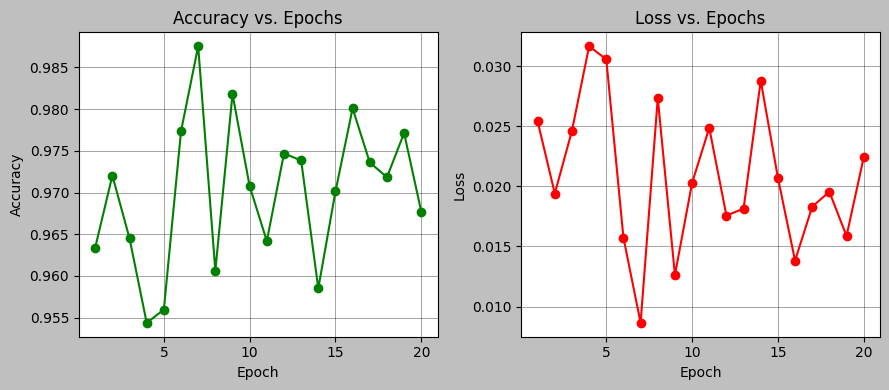

In [6]:
# STEP 4
epochs = 20  # Define the number of training epochs

# Create empty lists to store R2 scores and loss
train_r2_scores = []
train_losses = []

# Training loop over epochs for training data
for epoch in range(epochs):
    # Train the chain regressor
    chain_regressor.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = chain_regressor.predict(X_train)
    train_r2_score = r2_score(y_train, y_train_pred)
    train_r2_scores.append(train_r2_score)

    # Calculate the loss (mean squared error)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_losses.append(train_loss)

    # Print training R2 score and loss for training data
    print(f"NetPerformance - Epoch {epoch + 1} - Training Accuracy Score: {train_r2_score} - Loss: {train_loss}")

import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')  # Set the style to 'tableau-colorblind10'

# Set custom styles for the plots
#plt.style.use('grayscale')
#palette = plt.get_cmap('Set1')

# Adjust grid line visibility and size
#plt.rcParams['axes.grid'] = True
#plt.rcParams['axes.grid.which'] = 'both'
#plt.rcParams['grid.alpha'] = 0.5
#plt.rcParams['grid.linewidth'] = 0.5

# Set font sizes
#plt.rcParams['font.size'] = 10
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.titlesize'] = 12
#plt.rcParams['legend.fontsize'] = 12

# Plot R2 scores over epochs for training data
plt.figure(figsize=(9, 4))  # Smaller figsize

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_r2_scores, label='Training Accuracy Score', marker='o', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')



# Loss curve
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', marker='o', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')




plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [ ]:
 #STEP 5:
# User input for prediction
num_rows = int(input("Enter the number of rows:"))

# Create an empty1. DataFrame to store input values
input_table = pd.DataFrame(columns=['Bandwidth','Energy', 'PDR', 'Throughput', 'Bitrate', 'Delay'])

# Loop over the number of rows
for i in range(num_rows):
    row_number = i + 1
    print(f"\n\nEnter the values for row {row_number}:")
    bandwidth = float(input("Bandwidth: "))
    energy = float(input("Energy: "))
    der_pdr = float(input("PDR"))
    throughput = float(input("Throughput: "))
    bitrate = float(input("Bitrate: "))
    delay = float(input("Delay: "))

    # Create a new row with input values
    input_row = pd.DataFrame({'Bandwidth': [bandwidth], 'Energy': [energy], 'PDR': [der_pdr],
                              'Throughput': [throughput], 'Bitrate': [bitrate], 'Delay': [delay]})

    # Append the new row to the input table
    input_table = pd.concat([input_table, input_row], ignore_index=True)

# Apply styling to the input table
styled_input_table = input_table.style \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', 'lightgreen'),
                                     ('border', '3px solid red'),
                                     ('padding', '8px'),
                                     ('text-align', 'center')]}
    ]) \
    .set_properties(subset=['Bandwidth','Energy', 'PDR', 'Throughput', 'Bitrate', 'Delay'], **{'text-align': 'center'}) \
    .set_properties(subset=['Bandwidth','Energy', 'PDR', 'Throughput', 'Bitrate', 'Delay'], **{'width': '200px'})

# Render the styled input table with expanded width
styled_input_table_html = styled_input_table.to_html(escape=False)

# Display the styled input table
from IPython.display import display, HTML
display(HTML(styled_input_table_html))

Enter the number of rows:1


Enter the values for row 1:
Bandwidth: 125
Energy: 1.956151296
PDR0.208333333
Throughput: 2.304
Bitrate: 1.46484375
Delay: 0.49152


,Bandwidth,Energy,PDR,Throughput,Bitrate,Delay
0,125.000000,1.956151,0.208333,2.304000,1.464844,0.491520


In [ ]:
#STEP 6:
print('\n\nResult of the Predicted Network Performance\n')
# Predict the combination of (SF, CR, BW) based on user input
predicted_combination = chain_regressor.predict(input_table)

# Convert the predicted values to integers
predicted_combination = predicted_combination.astype(int)

# Create a table to display predicted combination
output_table = input_table.copy()

# Add predicted combination columns
output_table['Predicted Network Performance'] = predicted_combination[:, 0]

# Apply styling to the output table
styled_output_table = output_table[
    ['Bandwidth','Energy', 'PDR', 'Throughput', 'Bitrate', 'Delay', 'Predicted Network Performance']
].style \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', 'gray'),
                                     ('border', '3px solid red'),
                                     ('padding', '5px'),
                                     ('text-align', 'center'),
                                      ('font-size', '15px'),
                                     ('color', 'white')]},  # Set text color to white
        {'selector': 'th:first-child', 'props': [('color', 'white')]},  # Set serial number text color
        {'selector': 'td:nth-child(2)', 'props': [('color', 'black')]},  # Set Energy text color
        {'selector': 'td:nth-child(3)', 'props': [('color', 'black')]},  # Set DER(PDR) text color
        {'selector': 'td:nth-child(4)', 'props': [('color', 'black')]},  # Set Throughput text color
        {'selector': 'td:nth-child(5)', 'props': [('color', 'black')]},  # Set Bitrate text color
        {'selector': 'td:nth-child(6)', 'props': [('color', 'black')]},  # Set Delay text color
        {'selector': 'td:nth-child(7)', 'props': [('color', 'black')]},  # Set Predicted SF text color
        {'selector': 'td:nth-child(8)', 'props': [('color', '#dc3545')]},  # Set Predicted CR text color

    ]) \
   .set_properties(subset=['Bandwidth','Energy', 'PDR', 'Throughput', 'Bitrate', 'Delay', 'Predicted Network Performance'], **{'text-align': 'center'}) \
    .set_properties(subset=['Bandwidth','Energy', 'PDR', 'Throughput', 'Bitrate', 'Delay', 'Predicted Network Performance'], **{'width': '150px'})

# Render the styled output table
styled_output_table_html = styled_output_table.to_html(escape=False)

# Display the styled output table
display(HTML(styled_output_table_html))




Result of the Predicted Network Performance



,Bandwidth,Energy,PDR,Throughput,Bitrate,Delay,Predicted Network Performance
0,125.000000,1.956151,0.208333,2.304000,1.464844,0.491520,0
